# Log-Transform

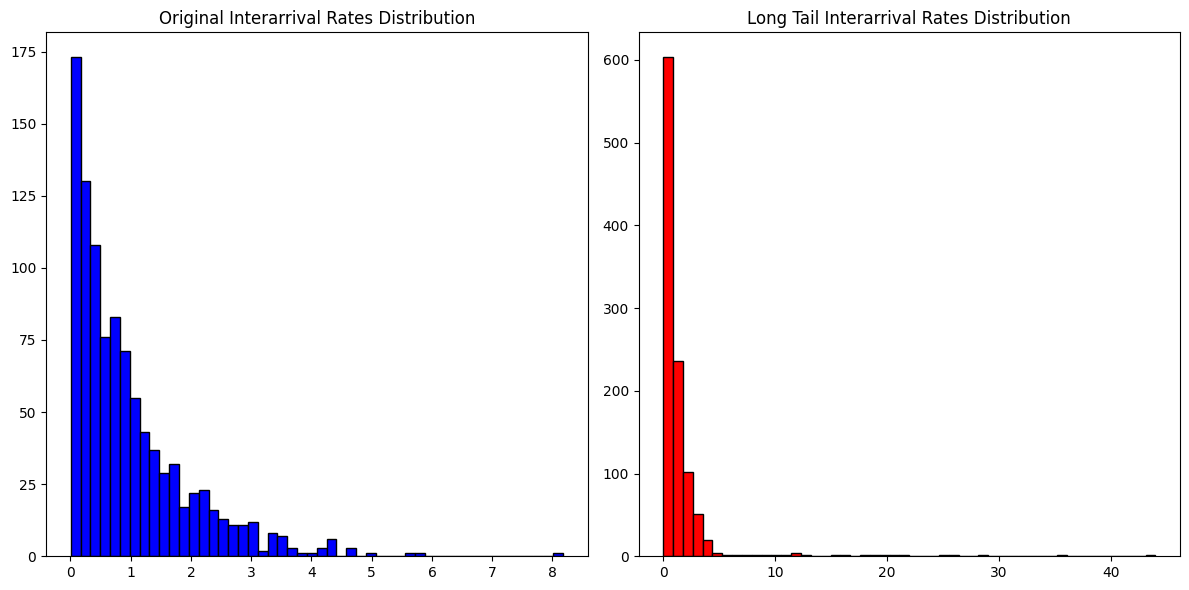

In [2]:
# Set a seed for reproducibility
np.random.seed(42)

# Generate long-tail interarrival rates
interarrival_rates = np.random.exponential(scale=1.0, size=1000)
long_tail_values = np.concatenate(
    (interarrival_rates, np.random.exponential(scale=10.0, size=50))
)

# Plot the original distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(interarrival_rates, bins=50, color="blue", edgecolor="black")
plt.title("Original Interarrival Rates Distribution")

# Plot the long-tail distribution
plt.subplot(1, 2, 2)
plt.hist(long_tail_values, bins=50, color="red", edgecolor="black")
plt.title("Long Tail Interarrival Rates Distribution")

plt.tight_layout()
plt.show()

# Z-Transform

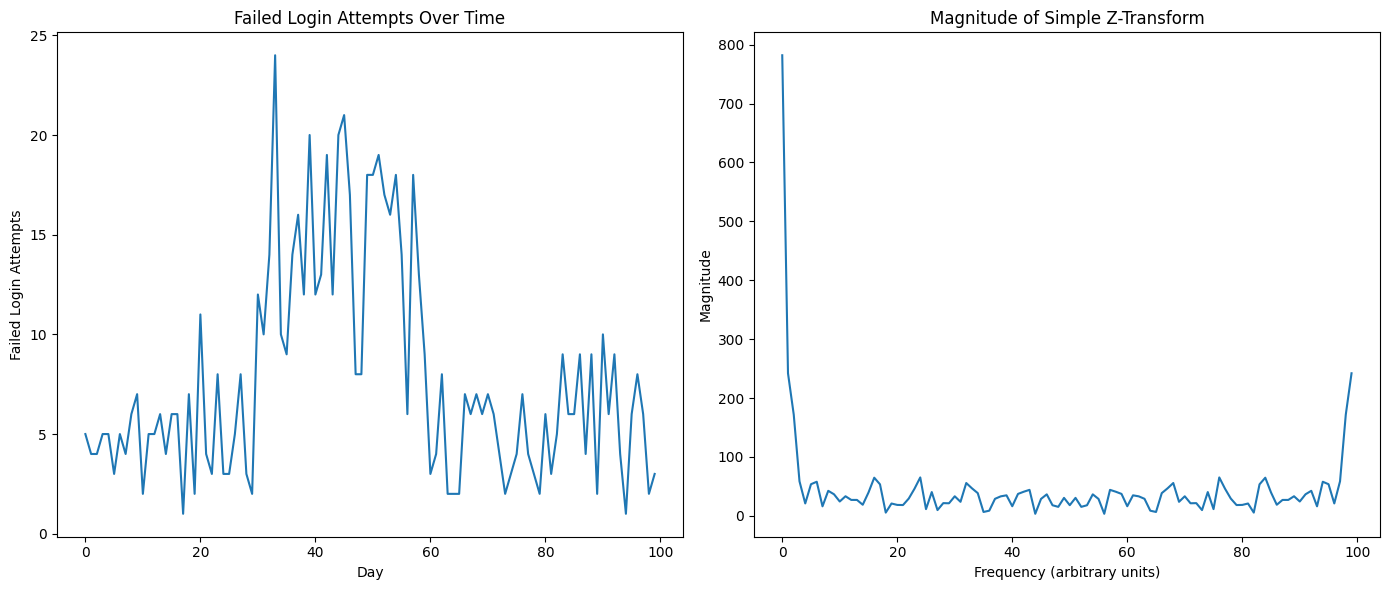

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data: failed login attempts over 100 days
np.random.seed(42)  # For reproducible results
time_days = np.arange(0, 100)
failed_logins = np.random.poisson(5, len(time_days))  # Average of 5 failed attempts per day

# Introduce a pattern: increase failed attempts indicating a brute force attack
for day in range(30, 60):
    failed_logins[day] += np.random.randint(5, 15)

# Simple Z-transform-like operation for demonstration (Discrete Fourier Transform could be more appropriate for real analysis)
# In real applications, use more sophisticated methods and libraries like scipy's signal processing tools
def simple_z_transform(data):
    N = len(data)
    z = np.exp(-2j * np.pi / N)  # Using a simple unity root for demonstration
    Z = np.array([sum(data * z**(-k * np.arange(N))) for k in range(N)])
    return Z

# Apply our simple Z-transform to the data
z_transformed = simple_z_transform(failed_logins)

# Visualizing the original and transformed data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x=time_days, y=failed_logins)
plt.title('Failed Login Attempts Over Time')
plt.xlabel('Day')
plt.ylabel('Failed Login Attempts')

plt.subplot(1, 2, 2)
# Plotting the magnitude of the Z-transform result
sns.lineplot(x=np.arange(len(z_transformed)), y=np.abs(z_transformed))
plt.title('Magnitude of Simple Z-Transform')
plt.xlabel('Frequency (arbitrary units)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


# Min-Max Scaling

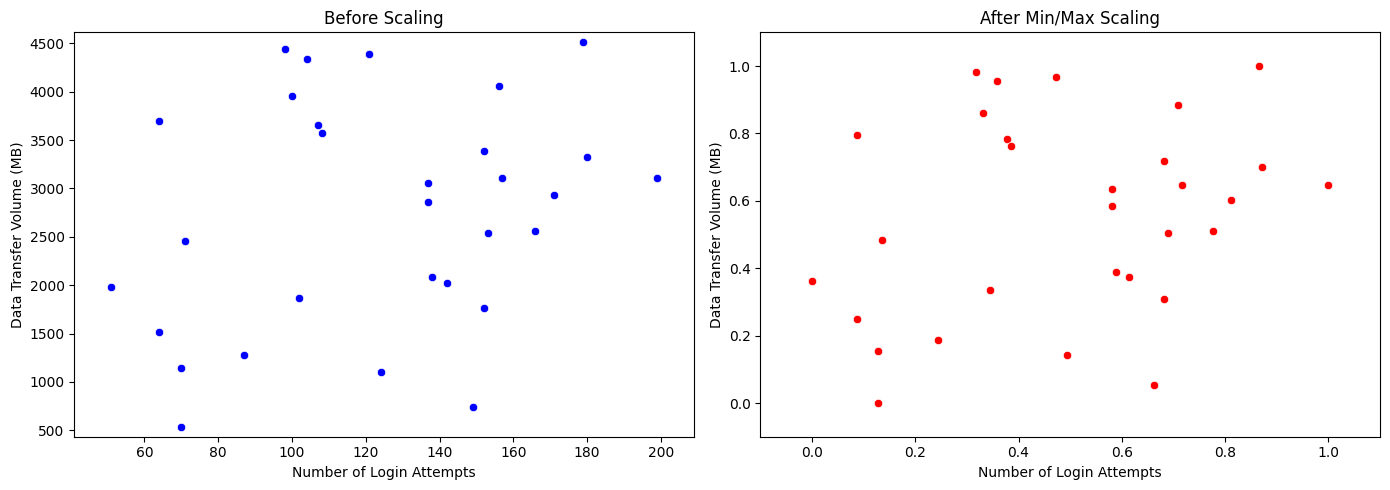

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic cybersecurity data
np.random.seed(42)
days = 30
number_of_login_attempts = np.random.randint(50, 200, days)
data_transfer_volume_mb = np.random.randint(500, 5000, days)

# Create a DataFrame
df = pd.DataFrame({
    'Number of Login Attempts': number_of_login_attempts,
    'Data Transfer Volume (MB)': data_transfer_volume_mb
})

# Min/Max scaling
df_scaled = (df - df.min()) / (df.max() - df.min())

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(data=df, x='Number of Login Attempts', y='Data Transfer Volume (MB)', ax=ax[0], color='blue')
ax[0].set_title('Before Scaling')
ax[0].set_xlim(df['Number of Login Attempts'].min() - 10, df['Number of Login Attempts'].max() + 10)
ax[0].set_ylim(df['Data Transfer Volume (MB)'].min() - 100, df['Data Transfer Volume (MB)'].max() + 100)

sns.scatterplot(data=df_scaled, x='Number of Login Attempts', y='Data Transfer Volume (MB)', ax=ax[1], color='red')
ax[1].set_title('After Min/Max Scaling')
ax[1].set_xlim(-0.1, 1.1)
ax[1].set_ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()
